## 1. Normal distribution. Using histograms with and without cumulative option observe how increasing variance and mean changes look of the distribution. Check how number of bins influences the plots. Consider what would make normal distribution weekly informative and what will make it informative.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Normal_dict = {
    "Normal_M=0_SD=1":np.random.normal(loc=0.,scale=1.,size=10000),
    "Normal_M=0_SD=5":np.random.normal(loc=0.,scale=5.,size=10000),
    "Normal_M=5_SD=5":np.random.normal(loc=5.,scale=5.,size=10000),
    "Normal_M=5_SD=1":np.random.normal(loc=5.,scale=1.,size=10000)
}

In [2]:
Dataframe=pd.DataFrame.from_dict(Normal_dict)

In [3]:
MeltedData=Dataframe.melt()

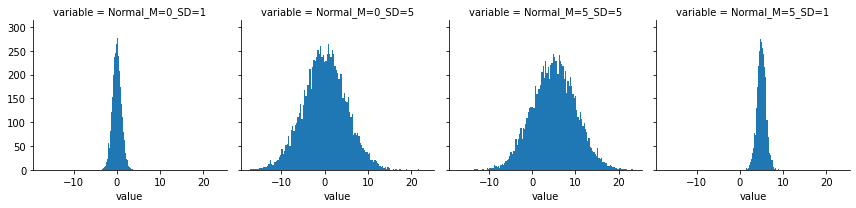

In [4]:
Graph=sns.FacetGrid(MeltedData, col="variable", sharex=True, col_wrap=4)
Graph.map(plt.hist, "value", cumulative=False, bins=128)

Normal distribution is really intuitive. Changing mean ($\mu$) move whole distribution to left or right on x axis.
Standard deviation ($\sigma$) represent spread of distribution, that's why it have to be positive.

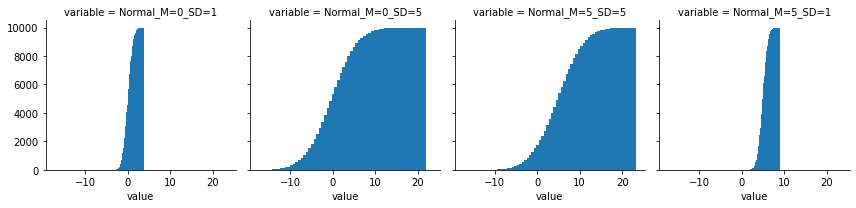

In [5]:
GraphCum=sns.FacetGrid(MeltedData, col="variable", sharex=True, col_wrap=4)
GraphCum.map(plt.hist,"value",cumulative=True,bins=64)

Cumulative distribution represent sum of probability from $-\inf$ to value of x.

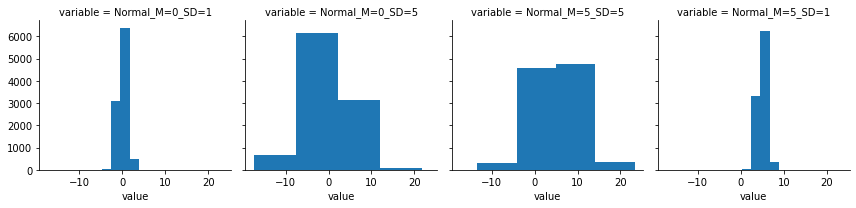

In [6]:
Graph=sns.FacetGrid(MeltedData, col="variable", sharex=True, col_wrap=4)
Graph.map(plt.hist, "value", cumulative=False, bins=4)

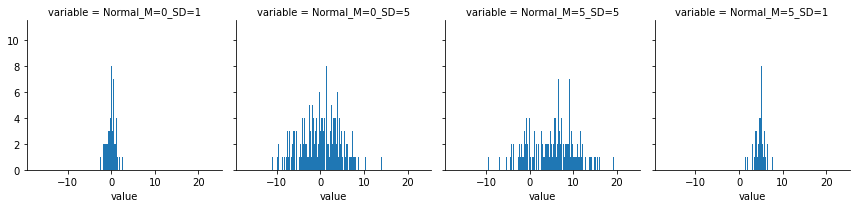

In [7]:
Graph=sns.FacetGrid(MeltedData, col="variable", sharex=True, col_wrap=4)
Graph.map(plt.hist, "value", cumulative=False, bins=10240)

Comparing above distributions we can see that with different amount of bins both too small and too large plots are weakly informative.
This is because the sum of the nearest values affects the height of the bar.
So if we have to large amount of bins we won't directly see where our distribution is focused.
In other hand if we have small amount of bins we will not se how tails of the distribution behave.

## 2. Transform samples from normal distribution with inverse logit. Consider how mean and standard deviation influence the shape of histogram and cdf. Is previously non-informative normal is still non-informative after transformation?

In [8]:
from scipy.special import expit
ExpitData=expit(Dataframe)
MeltedExpit=ExpitData.melt()

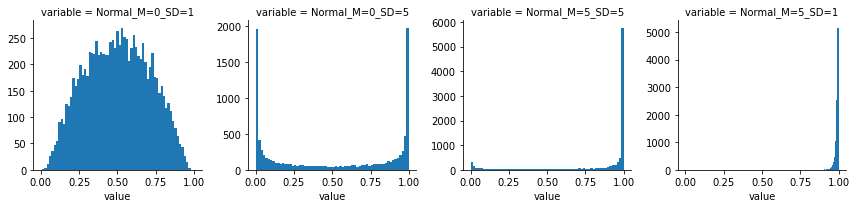

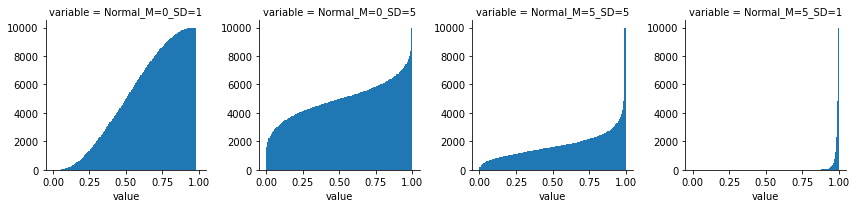

In [9]:
GraphExpit=sns.FacetGrid(MeltedExpit, col="variable", sharey=False, sharex=True, col_wrap=4)
GraphExpit.map(plt.hist, "value", cumulative=False, bins=64)
GraphExpitCum=sns.FacetGrid(MeltedExpit, col="variable", sharey=False, sharex=True, col_wrap=4)
GraphExpitCum.map(plt.hist, "value", cumulative=True, bins=128)

Expit function is inverse of logit function which transfer probability to logarithm of odds.
So it should describe how far how much the distribution tilts to the given page with de center of mass in 0.5 point.
So as we can se for distribution 3 and 4 almost all probability is near 1. 1st one have not high standard deviation so it have most data around 0.5.
2nd distribuiton have mean = 0 but larger standard deviation then distribuiton 1, thats why most of mass are focused in 0 and 1.

## 3. Poisson distribution. This distribution returns integers (give histogram location of bins instead of their numbers), depending on intensity. This is a good distribution for modelling countable effects. Observe how mean and variance influence the shape.

In [10]:
Poisson_dict={
    "Poisson_Interval=1":np.random.poisson(1,100000),
    "Poisson_Interval=4":np.random.poisson(4,100000),
    "Poisson_Interval=9":np.random.poisson(9,100000),
    "Poisson_Interval=20":np.random.poisson(20,100000)
}

In [11]:
Dataframe_Poisson=pd.DataFrame.from_dict(Poisson_dict)
Melted_Poisson=Dataframe_Poisson.melt()

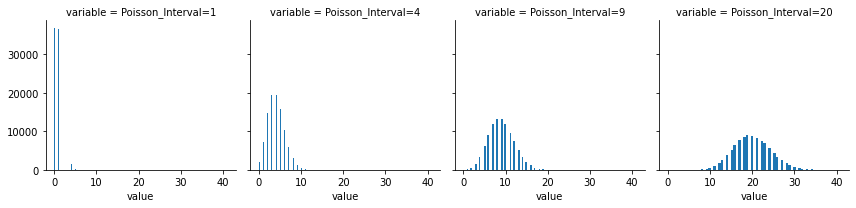

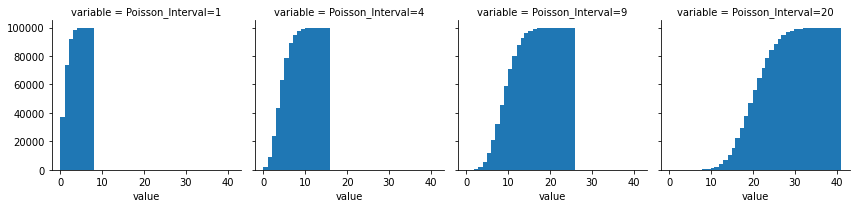

In [12]:
Graph_Poisson=sns.FacetGrid(Melted_Poisson, col="variable", sharex=True, col_wrap=4)
Graph_Poisson.map(plt.hist, "value", cumulative=False, bins=64)
Graph_Poisson_Cum=sns.FacetGrid(Melted_Poisson, col="variable", sharex=True, col_wrap=4)
Graph_Poisson_Cum.map(plt.hist, "value", cumulative=True, bins=128)

Poisson distribution behave like normal distribution with $\sigma = \sqrt \mu$.
So it's easy to understand why for higher value of interval hist spread rise.
This is a good distribution to determine the probability of an event occurring if you know how often it occurs.
Considering most typical example for that distribution; waiting for bus at bus stop.
If we know that bus should appear every 6 min, the most likely situation is that the bus will arrive up to 6 min, but it's not for 100%.
We know that there are traffics in the city, so delay can appear. So we represent our lack of knowledge as random distribution knowing at the same time that there is no randomness when the bus arrives, but there is our lack of knowledge about traffics and events on the road what is perfectly described by poisson distribution. 

## 4. Beta distribution. This is a distribution defined on [0,1] interval. It is useful as a prior for probability parameters (like binomial distribution). Traditionally it is defined with $\alpha$ and $\beta$ parameters. There are however different reparametrizations possible. Verify how beta distributions behave for their natural parametrization, location dispersion parametrization and mean-population size parametrization (see lecture notes)

In [13]:
Beta_dict={
    "Beta_alpha=1_beta=1":np.random.beta(1,1,10000),
    "Beta_alpha=10_beta=1":np.random.beta(10,1,10000),
    "Beta_alpha=1_beta=10":np.random.beta(1,10,10000),
    "Beta_alpha=10_beta=10":np.random.beta(10,10,10000),
    "Beta_alpha=3_beta=9":np.random.beta(3,9,10000),
    "Beta_alpha=8_beta=2":np.random.beta(8,2,10000)
}

In [14]:
Dataframe_Beta=pd.DataFrame.from_dict(Beta_dict)
Melted_Beta=Dataframe_Beta.melt()

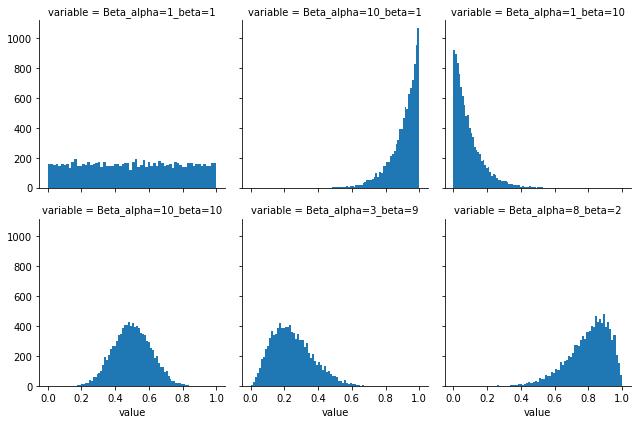

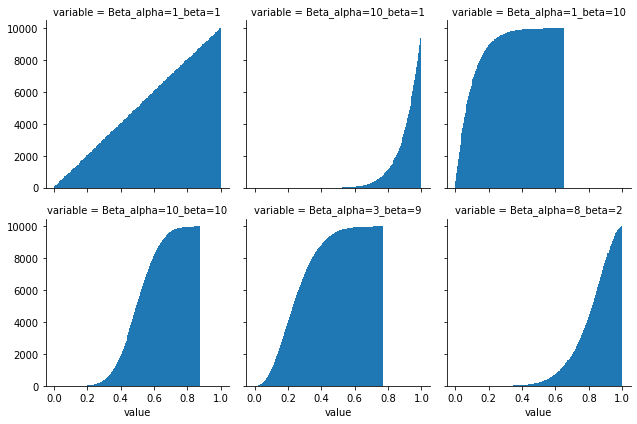

In [15]:
Graph_Beta=sns.FacetGrid(Melted_Beta, col="variable", sharex=True, col_wrap=3)
Graph_Beta.map(plt.hist, "value", cumulative=False, bins=64)
Graph_Beta_Cum=sns.FacetGrid(Melted_Beta, col="variable", sharex=True, col_wrap=3)
Graph_Beta_Cum.map(plt.hist, "value", cumulative=True, bins=128)

Assuming the values of $\alpha$ and $\beta$ = 1, the probabilities are raised to the 0-th power so it's equal to 1, so beta is uniformly distributed what we can so on 1st plot.
The expected value is $\frac{\alpha}{\alpha + \beta}$, so increasing value of $\alpha$ distribution will move distribution to 1 value and beta will have oposite effect
Considering $\alpha$ as number of successes + 1 and $\beta$ as number of failures given apriori we receive $\theta$ which represents distribution of probability of successes.
In other words from $\theta$ values we know how much the coin is unbalanced in our roll. 
Considering 4th distribuiton for $\alpha=10$ and $\beta=10$ what corresponds to 10 successes from 20 attempts we know that most probably fact is that our coin is fair, but we cannot be shure thats why we still have standard deviation from this value.

## 5. Log-normal distribution. This is a great distributions for positive variables, especially if scale can differ (for example salaries). Assumtion is that the logarithm of variable of interest is normaly distributed. Observe how mean and variance of normal distribution are propagating through transformation.

In [16]:
Lognormal_dict={
    "Lognormal_M=0_S=1":np.random.lognormal(size=10000),
    "Lognormal_M=2_S=0.2":np.random.lognormal(2,0.2,10000),
    "Lognormal_M=1_S=0.5":np.random.lognormal(0,0.5,10000),
    "Lognormal_M=10_S=1":np.random.lognormal(10,1,10000),
    "Lognormal_M=0_S=0.2":np.random.lognormal(0,0.2,10000),
    "Lognormal_M=0.1_S=2":np.random.lognormal(0.1,2,10000)
}

In [17]:
Dataframe_Lognormal=pd.DataFrame.from_dict(Lognormal_dict)
Melted_Lognormal=Dataframe_Lognormal.melt()

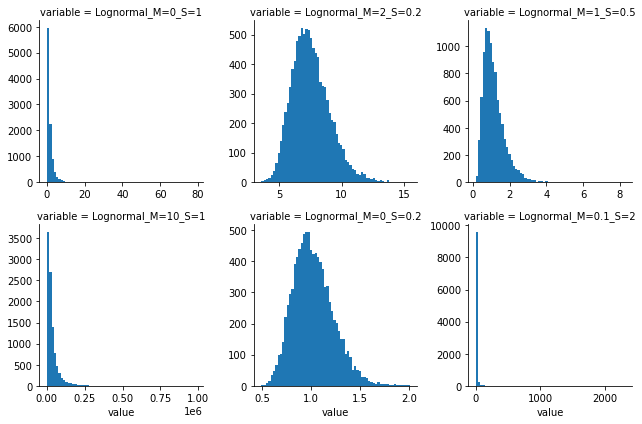

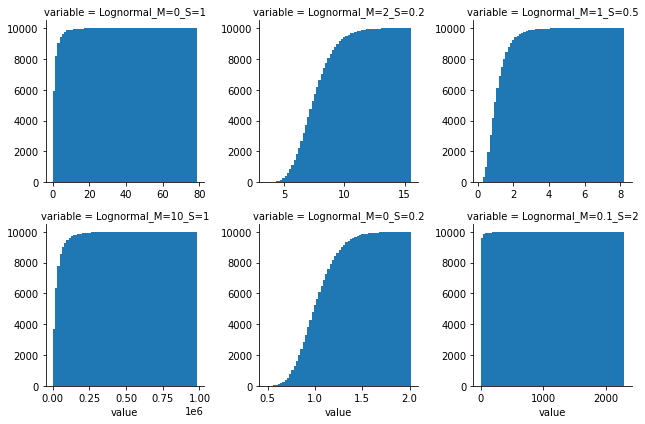

In [18]:
Graph_Lognormal=sns.FacetGrid(Melted_Lognormal, col="variable", sharex=False, sharey=False, col_wrap=3)
Graph_Lognormal.map(plt.hist, "value", cumulative=False, bins=64)
Graph_Lognormal_Cum=sns.FacetGrid(Melted_Lognormal, col="variable", sharex=False, sharey=False, col_wrap=3)
Graph_Lognormal_Cum.map(plt.hist, "value", cumulative=True, bins=64)

Lognormal distribution behave exactly like in logarithmic scale. That's why for $\mu=0$ mean is in 1
